In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
penguins = pd.read_csv("penguins.csv")

In [ ]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
penguins.drop("flipper_length_mm", axis=1 , inplace= True)

In [ ]:
penguins.drop("body_mass_g", axis=1 , inplace= True)

In [ ]:
penguins.drop("sex", axis=1, inplace = True)

In [ ]:
penguins.drop("island", axis=1, inplace = True)

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   species           344 non-null    object 
 1   culmen_length_mm  342 non-null    float64
 2   culmen_depth_mm   342 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.2+ KB


In [ ]:
penguins.isna()#check for na's

,species,culmen_length_mm,culmen_depth_mm
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,True
4,False,False,False
...,...,...,...
339,False,True,True
340,False,False,False
341,False,False,False
342,False,False,False


In [ ]:
#remove na's
penguins.dropna(inplace=True)

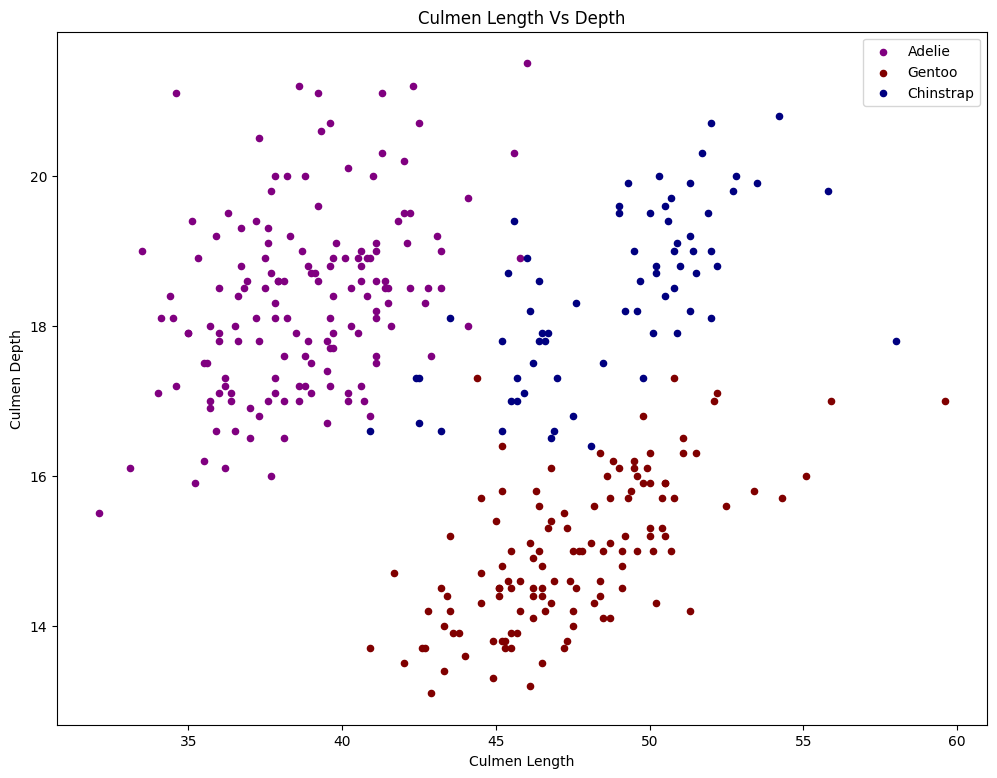

In [ ]:
fig = penguins[penguins.species == 'Adelie'].plot(kind='scatter', x='culmen_length_mm', y='culmen_depth_mm', color='purple', label='Adelie')
penguins[penguins.species == 'Gentoo'].plot(kind='scatter', x='culmen_length_mm', y='culmen_depth_mm', color='maroon', label='Gentoo', ax=fig)
penguins[penguins.species == 'Chinstrap'].plot(kind='scatter', x='culmen_length_mm', y='culmen_depth_mm', color='navy', label='Chinstrap', ax=fig)

fig.set_xlabel('Culmen Length')
fig.set_ylabel('Culmen Depth')
fig.set_title('Culmen Length Vs Depth')

fig=plt.gcf()
fig.set_size_inches(12, 9)
plt.show()

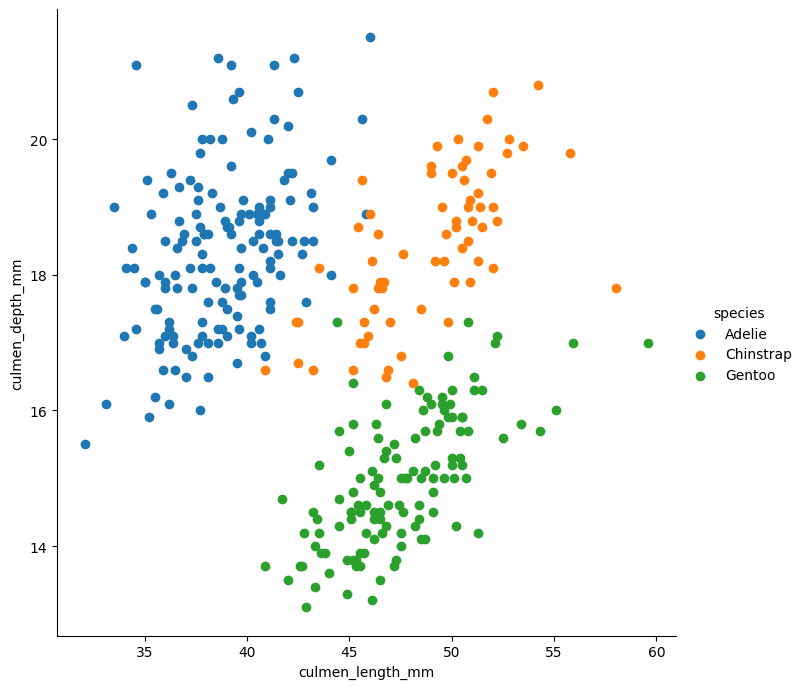

In [ ]:
sns.FacetGrid(penguins, hue='species', height=7)\
   .map(plt.scatter, 'culmen_length_mm', 'culmen_depth_mm')\
   .add_legend()

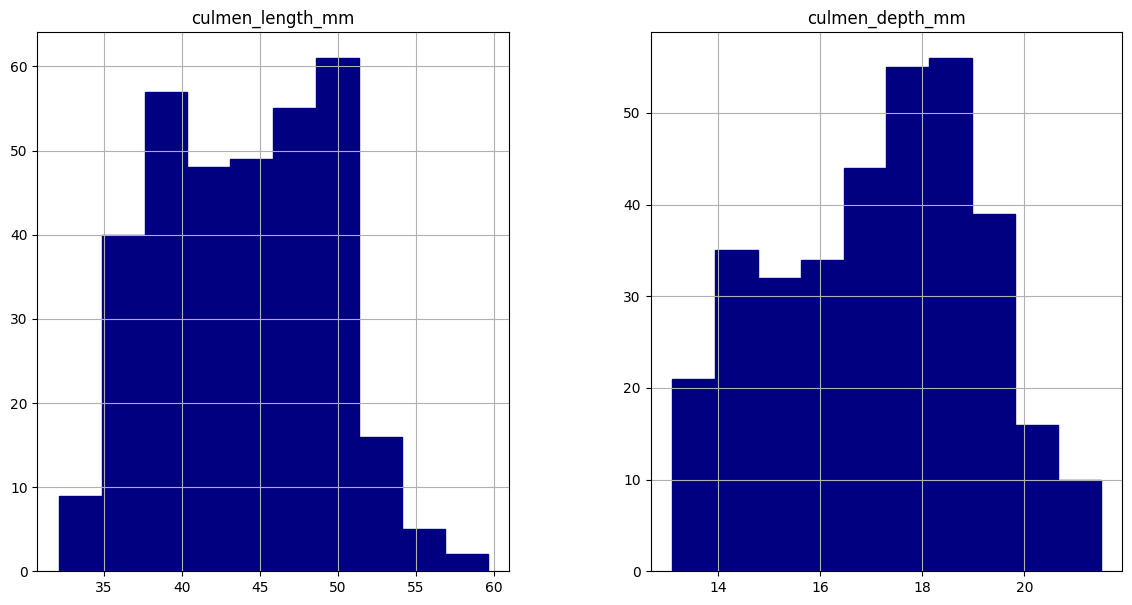

In [ ]:
penguins.hist(color='navy',edgecolor='navy', linewidth=1)
fig = plt.gcf()
fig.set_size_inches(14,7)
plt.show()

<Axes: xlabel='species', ylabel='culmen_depth_mm'>

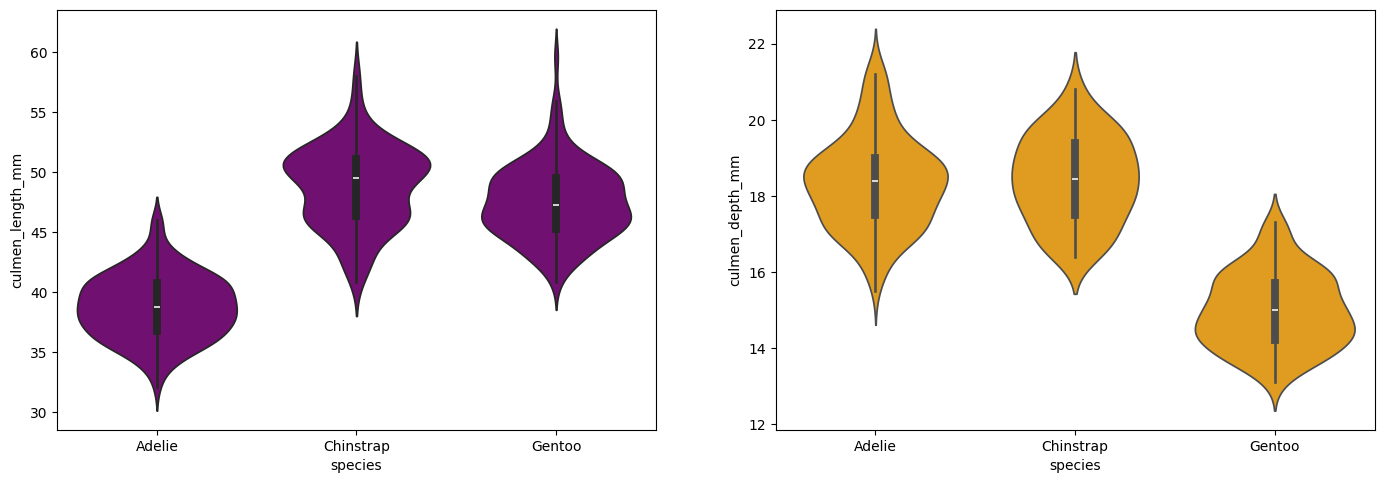

In [ ]:
plt.figure(figsize=(17,12))
plt.subplot(2,2,1)
sns.violinplot(x='species', y = 'culmen_length_mm', data=penguins,color='purple')
plt.subplot(2,2,2)
sns.violinplot(x='species', y = 'culmen_depth_mm', data=penguins,color='orange')


In [ ]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

In [ ]:
penguins.shape

(342, 3)

In [ ]:
train, test = train_test_split(penguins, test_size=0.2) # our main data split into train and test
# the attribute test_size=0.2 splits the data into 80% and 20% ratio. train=80% and test=20%
print(train.shape)
print(test.shape)

(273, 3)
(69, 3)


In [ ]:
train_X = train[['culmen_length_mm','culmen_depth_mm']] # taking the training data features
train_y = train.species # output of the training data

test_X = test[['culmen_length_mm','culmen_depth_mm']] # taking test data feature
test_y = test.species # output value of the test data

In [ ]:
train_X.head()

,culmen_length_mm,culmen_depth_mm
145,39.0,18.7
236,42.0,13.5
1,39.5,17.4
249,50.0,15.3
256,42.6,13.7


In [ ]:
test_X.head()

,culmen_length_mm,culmen_depth_mm
227,46.7,15.3
269,45.2,15.8
178,50.5,18.4
181,52.8,20.0
22,35.9,19.2


In [ ]:
train_y.head()

,species
145,Adelie
236,Gentoo
1,Adelie
249,Gentoo
256,Gentoo


In [ ]:
culmen = penguins[['culmen_length_mm','culmen_depth_mm','species']]

In [ ]:
train_c,test_c = train_test_split(culmen, test_size=0.2, random_state=42)
train_x_c = train_c[['culmen_length_mm','culmen_depth_mm']]
train_y_c = train_c.species

test_x_c = test_c[['culmen_length_mm','culmen_depth_mm']]
test_y_c = test_c.species

In [ ]:
#SVM
model=svm.SVC()
model.fit(train_x_c,train_y_c)
prediction=model.predict(test_x_c)
svm_score = metrics.accuracy_score(prediction,test_y_c)
print('The accuracy of the SVM model using culmen is:',svm_score)


The accuracy of the SVM model using culmen is: 0.927536231884058


In [ ]:
#Logistic Regression
model = LogisticRegression()
model.fit(train_x_c,train_y_c)
prediction=model.predict(test_x_c)
lr_score = metrics.accuracy_score(prediction,test_y_c)
print('The accuracy of the Logistic Regression model using culmen is:',lr_score)


The accuracy of the Logistic Regression model using culmen is: 0.9855072463768116


In [ ]:
#Decision Tree
model=DecisionTreeClassifier()
model.fit(train_x_c,train_y_c)
prediction=model.predict(test_x_c)
dt_score = metrics.accuracy_score(prediction,test_y_c)
print('The accuracy of the Decision Tree model using culmen is:',dt_score)

The accuracy of the Decision Tree model using culmen is: 0.9710144927536232


In [ ]:
model=KNeighborsClassifier(n_neighbors=6)
model.fit(train_x_c,train_y_c)
prediction=model.predict(test_x_c)
knn_score = metrics.accuracy_score(prediction,test_y_c)
print('The accuracy of the KNN model using culmen is:',knn_score)

The accuracy of the KNN model using culmen is: 0.9565217391304348


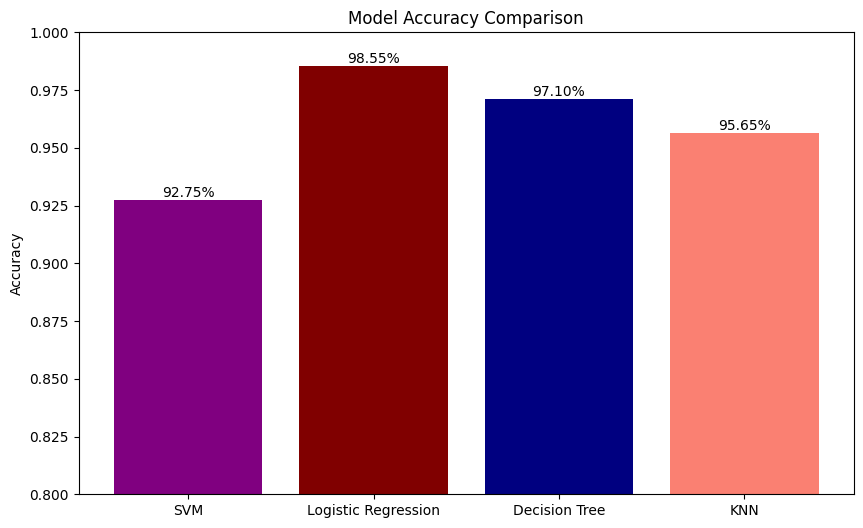

In [176]:
import matplotlib.pyplot as plt

# Using the existing accuracy scores for models trained with culmen features
accuracies_culmen = {
    'SVM': svm_score,
    'Logistic Regression': lr_score,
    'Decision Tree': dt_score,
    'KNN': knn_score
}

model_names_culmen = list(accuracies_culmen.keys())
accuracy_values_culmen = list(accuracies_culmen.values())

plt.figure(figsize=(10, 6))
bars_culmen = plt.bar(model_names_culmen, accuracy_values_culmen, color=['purple', 'maroon', 'navy', 'salmon'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.8, 1.0)


for bar in bars_culmen:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2%}', va='bottom', ha='center')

plt.show()